## Project 3 proposal


### Data source location:-
The Dataset is available for free download using the below link.
https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv

For overview and more info:

https://data.london.gov.uk/dataset/number-international-visitors-london

https://www.kaggle.com/unsdsn/world-happiness#2017.csv

https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2018&start=1995


#### Data source Discovery:-
I found this Dataset in one of the links provided in the Data sources in Blackboard. I went through a lot of other Datasets but I felt that this Dataset has interesting hypotheses around it and a lot of analysis can be done on it.

#### Legality and Cost:-
This Dataset is absolutely free to download and legal to access as well.

#### Documented EDA:-
There's no such EDA or Visualization available on the web for this Dataset.


#### Project Proposal:-
The size of this Dataset 1 is 4.99 MB with 11 columns and 58977 rows, the 2nd Dataset has data from 2015 to 2019 in different CSV files each file has 159 rows and 12 columns and sizes are under 30 KB and the 3rd Dataset has 20 columns and 228 rows with the size of 39 KB. All these datasets can be merged to answer some interesting hypotheses.

For Example some claims are:-

1: Do the visitors count visiting London depends on the Happiness Rank of that country?

2: Does the countries with highest GDP have more people from that country visiting London?

3: Do the people in the countries with highest GDP have are more Happy? 

4: Does the countries with highest GDP Spend more at visiting?

In [1]:
#Import the required packages that are required for doing analysis
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
import numpy as np
import missingno as mn


### Get the visitors data  

In [2]:

#Read the visitors data from the csv using the download link into a Dataframe directly                                                                                           usecols = [0,2,5,6,7,8,9],
visitors_data = pd.read_csv("https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv",engine='python')
visitors_data.tail(4)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
59800,2019P,July-September,Other Africa,15+ nights,Air,Holiday,LONDON,0.622189,3.073887,19.910048,1
59801,2019P,July-September,Other Africa,15+ nights,Air,Business,LONDON,0.998596,1.013575,14.978940,1
59802,2019P,July-September,Other Africa,15+ nights,Air,VFR,LONDON,3.397224,2.913100,70.055739,6
59803,2019P,July-September,Other Africa,15+ nights,Air,Miscellaneous,LONDON,1.071057,1.122145,21.994084,2


In [3]:
print('(Number of rows, Columns)')

#Replace the values and columns based on our requirement
visitors_data.rename(columns={'market':'Country'}, inplace = True)
visitors_data['year'].replace({'2019P':'2019'}, inplace = True)
visitors_data['Country'].replace({'USA':'United States'},inplace=True)

visitors_data1=visitors_data.loc[visitors_data['year'].isin(['2015','2016','2017','2018','2019'])]

#Display shape
visitors_data1.shape

(Number of rows, Columns)


(15351, 11)

In [4]:
#Check for null values
visitors_data1.isnull().sum()

year             0
quarter          0
Country          0
dur_stay         0
mode             0
purpose          0
area             0
Visits (000s)    0
Spend (£m)       0
Nights (000s)    0
sample           0
dtype: int64

In [5]:
#Check for unique values per column present in the Data
visitors_data1.nunique()

year                 5
quarter              4
Country             62
dur_stay             4
mode                 3
purpose              5
area                 1
Visits (000s)    13785
Spend (£m)       15173
Nights (000s)    15082
sample             125
dtype: int64

### Create sum of visits, amount spent, Nights spent data frames and get into a Single Data Frame

In [6]:
sum_visits_df=visitors_data1.groupby(['Country','year']).sum()['Visits (000s)'].to_frame(name='value').reset_index()

sum_visits_df.insert(0,'Filter_field','Sum_visits (000s)')
sum_visits_df.head(5)

,Filter_field,Country,year,value
0,Sum_visits (000s),Argentina,2015,113.332157
1,Sum_visits (000s),Argentina,2016,126.114561
2,Sum_visits (000s),Argentina,2017,107.029177
3,Sum_visits (000s),Argentina,2018,115.306681
4,Sum_visits (000s),Argentina,2019,73.969533


In [7]:
nights_spent_df=visitors_data1.groupby(['Country','year']).sum()['Nights (000s)'].to_frame(name='value').reset_index()

nights_spent_df.insert(0,'Filter_field','nights_spent (000s)')
nights_spent_df.head(5)

,Filter_field,Country,year,value
0,nights_spent (000s),Argentina,2015,714.647259
1,nights_spent (000s),Argentina,2016,685.384849
2,nights_spent (000s),Argentina,2017,538.802742
3,nights_spent (000s),Argentina,2018,1681.508794
4,nights_spent (000s),Argentina,2019,577.883422


In [8]:
sum_spends_df=visitors_data1.groupby(['Country','year']).sum()['Spend (£m)'].to_frame(name='value').reset_index()

sum_spends_df.insert(0,'Filter_field','Sum_spends (£m)')
sum_spends_df.head(5)

,Filter_field,Country,year,value
0,Sum_spends (£m),Argentina,2015,73.246060
1,Sum_spends (£m),Argentina,2016,65.547183
2,Sum_spends (£m),Argentina,2017,66.247117
3,Sum_spends (£m),Argentina,2018,120.953955
4,Sum_spends (£m),Argentina,2019,33.146032


In [9]:
#Final visitors dataframe 
visitors_df=pd.concat([sum_visits_df,sum_spends_df,nights_spent_df],sort=False)
visitors_df.tail(10)

,Filter_field,Country,year,value
300,nights_spent (000s),United Arab Emirates,2015,1504.943136
301,nights_spent (000s),United Arab Emirates,2016,1356.466142
302,nights_spent (000s),United Arab Emirates,2017,1763.796996
303,nights_spent (000s),United Arab Emirates,2018,1602.184719
304,nights_spent (000s),United Arab Emirates,2019,1253.038848
305,nights_spent (000s),United States,2015,11832.380423
306,nights_spent (000s),United States,2016,12435.198588
307,nights_spent (000s),United States,2017,15196.108066
308,nights_spent (000s),United States,2018,14965.461266
309,nights_spent (000s),United States,2019,11164.751777


### Get the happiness rank data from the csv's and Transform the dataframe into required format

In [10]:
#To load all the CSV's containing the Happiness Index values
list_of_years=['2016','2017','2018','2019']


#Load the first csv(2015 data)
df_2015=pd.read_csv('2015.csv',usecols = [0,2,3,5,7])

#Transpose it to get into the required format
df_2015_T=df_2015.transpose().reset_index().rename(columns={'index':'Variable'})
header=df_2015_T.iloc[0]
df_2015_T=df_2015_T[1:]
df_2015_T.columns=header


#Get the data into tidy data form
formatted_df = pd.melt(df_2015_T,["Country"], var_name="State", value_name="value")
formatted_df.rename(columns={'Country':'Filter_field','State':'Country'},inplace=True)

#Add the year column
formatted_df.insert( 2, 'year', '2015')


for year in list_of_years:
    
    path=year+'.csv'
    
    if year =='2017':
        
        #Load the data from the files and rename the columns (Only load the required columns)
        year_df = pd.read_csv(path,usecols = [0,1,2,5,7])
        year_df.rename(columns={'Country or region':'Country','Economy..GDP.per.Capita.':'Economy (GDP per Capita)','GDP per capita':'Economy (GDP per Capita)','Happiness.Rank':'Happiness Rank'}, inplace = True)
        year_df.rename(columns={'Happiness.Score':'Happiness Score','Health..Life.Expectancy.':'Health (Life Expectancy)','Overall rank':'Happiness Rank','Score':'Happiness Score'},inplace = True)

        #Transpose the dataframe and get it into required form it to get into the required format
        year_df_T=year_df.transpose().reset_index().rename(columns={'index':'Variable'})
        header=year_df_T.iloc[0]
        year_df_T=year_df_T[1:]
        year_df_T.columns=header
        year_df=pd.melt(year_df_T,["Country"], var_name="State", value_name="value")
        year_df['year']=year
        year_df.rename(columns={'Country':'Filter_field','State':'Country'},inplace=True)

        year_df['year']=year
        
    elif year in ['2018','2019']:
        #Load the data from the files and rename the columns (Only load the required columns)
        year_df = pd.read_csv(path,usecols = [1,0,2,3,5])
        year_df.rename(columns={'Country or region':'Country','Economy..GDP.per.Capita.':'Economy (GDP per Capita)','GDP per capita':'Economy (GDP per Capita)','Happiness.Rank':'Happiness Rank'}, inplace = True)
        year_df.rename(columns={'Happiness.Score':'Happiness Score','Health..Life.Expectancy.':'Health (Life Expectancy)','Overall rank':'Happiness Rank','Score':'Happiness Score','Healthy life expectancy':'Health (Life Expectancy)'}, inplace = True)
        year_df = year_df[['Country', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)']]

        
        #Transpose the dataframe and get it into required form it to get into the required format
        year_df_T=year_df.transpose().reset_index().rename(columns={'index':'Variable'})
        header=year_df_T.iloc[0]
        year_df_T=year_df_T[1:]
        year_df_T.columns=header
        year_df=pd.melt(year_df_T,["Country"], var_name="State", value_name="value")
        year_df['year']=year
        year_df.rename(columns={'Country':'Filter_field','State':'Country'},inplace=True)

    
    else:
        #Load the data from the files and rename the columns (Only load the required columns)
        year_df = pd.read_csv(path,usecols = [0,2,3,6,8])
        
        #Transpose the dataframe and get it into required form it to get into the required format
        year_df_T=year_df.transpose().reset_index().rename(columns={'index':'Variable'})
        header=year_df_T.iloc[0]
        year_df_T=year_df_T[1:]
        year_df_T.columns=header
        year_df=pd.melt(year_df_T,["Country"], var_name="State", value_name="value")
        year_df['year']=year
        year_df.rename(columns={'Country':'Filter_field','State':'Country'},inplace=True)

    #Concat all the years data into a single data frame
    formatted_df=pd.concat([formatted_df,year_df],sort=False)
    print('(Number of rows, Columns)')


formatted_df.shape

(Number of rows, Columns)
(Number of rows, Columns)
(Number of rows, Columns)
(Number of rows, Columns)


(3128, 4)

In [11]:
formatted_df['Filter_field'].replace({'Economy (GDP per Capita)':'GDP contribution in Happiness Rank','Health (Life Expectancy)':'Life Expectancy contribution in Happiness Rank'},inplace=True)
formatted_df.tail(4)

,Filter_field,Country,year,value
620,Happiness Rank,South Sudan,2019,156
621,Happiness Score,South Sudan,2019,2.853
622,GDP contribution in Happiness Rank,South Sudan,2019,0.306
623,Life Expectancy contribution in Happiness Rank,South Sudan,2019,0.295


### Get the GDP Data 

In [12]:
#Load the GDP data frame and load only required columns(since we have happiness index only from 2015, load gdp's from 2015)
gdp_df=pd.read_csv(r"C:\Users\aslam\Downloads\API_NY.GDP.MKTP.CD_DS2_en_csv_v2_988718.csv",usecols = ['Country Name','Indicator Name','2015','2016','2017','2018'],skiprows=4)

gdp_df.columns

Index(['Country Name', 'Indicator Name', '2015', '2016', '2017', '2018'], dtype='object')

In [13]:
#format the data into tidy data form (as there are columns which can be moved to a single column)
formatted_df1 = pd.melt(gdp_df,["Country Name",'Indicator Name'], var_name="year", value_name="value")
formatted_df1.rename(columns={'Indicator Name':'Filter_field','Country Name':'Country'},inplace=True)

formatted_df1.head(10)

,Country,Filter_field,year,value
0,Aruba,GDP (current US$),2015,2.691620e+09
1,Afghanistan,GDP (current US$),2015,1.990711e+10
2,Angola,GDP (current US$),2015,1.161936e+11
3,Albania,GDP (current US$),2015,1.138693e+10
4,Andorra,GDP (current US$),2015,2.811489e+09
5,Arab World,GDP (current US$),2015,2.557895e+12
6,United Arab Emirates,GDP (current US$),2015,3.581351e+11
7,Argentina,GDP (current US$),2015,5.947493e+11
8,Armenia,GDP (current US$),2015,1.055334e+10
9,American Samoa,GDP (current US$),2015,6.610000e+08


### Final Concat all the 3 Data Frames 

In [14]:
#Concat the data from all the 3 files (Visitors data, Happiness index data, GDP data)
df=pd.concat([visitors_df,formatted_df,formatted_df1],sort=False)
df["year"]= df["year"].astype(int)
df["value"]= df["value"].astype(float)

df.isnull().sum()


#df.to_csv(r"C:\Users\aslam\Downloads\combined_data.csv", index = False, header=True)

Filter_field     0
Country          0
year             0
value           69
dtype: int64

In [15]:
#Fill the null values with zero
df['value'].fillna(0, inplace=True)

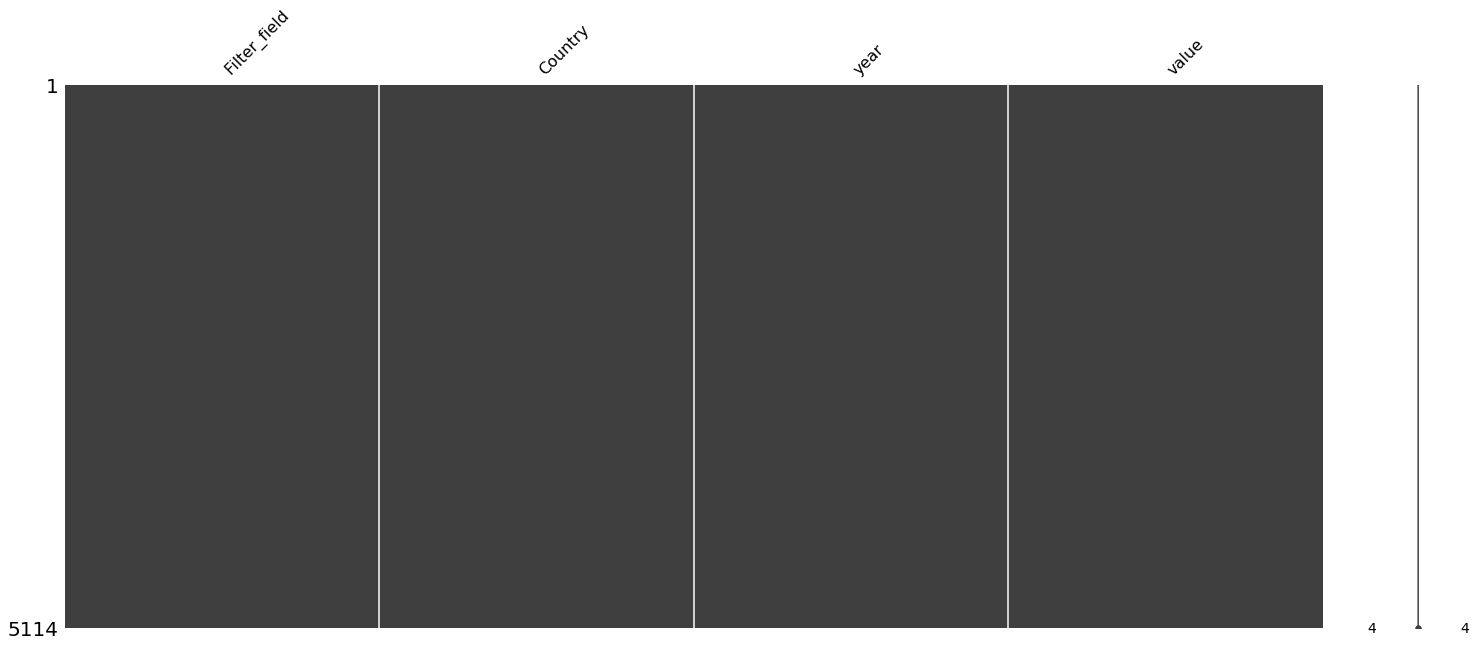

In [16]:
#Check if there are any missing values present
mn.matrix(df)

In [17]:
df.head(4)

,Filter_field,Country,year,value
0,Sum_visits (000s),Argentina,2015,113.332157
1,Sum_visits (000s),Argentina,2016,126.114561
2,Sum_visits (000s),Argentina,2017,107.029177
3,Sum_visits (000s),Argentina,2018,115.306681


#### A second dataframe is required to pass for plotting 

In [18]:
#Read the data from the csv using the download link into a Dataframe directly
visitors_data = pd.read_csv("https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv",engine='python')
visitors_data.rename(columns={'market':'Country'}, inplace = True)
visitors_data['year'].replace({'2019P':'2019'}, inplace = True)

#
l1=['2016','2017','2018','2019']

full_df=pd.read_csv('2015.csv',engine='python')
full_df['year']='2015'
for i in l1:
    path=i+'.csv'
    if i in ['2017','2018','2019']:
        visitors1 = pd.read_csv(path,engine='python')
        visitors1.rename(columns={'Country or region':'Country'}, inplace = True)
        visitors1.rename(columns={'Economy..GDP.per.Capita.':'Economy (GDP per Capita)'}, inplace = True)
        visitors1.rename(columns={'GDP per capita':'Economy (GDP per Capita)'}, inplace = True)
        visitors1['year']=i
    else:
        visitors1 = pd.read_csv(path,engine='python')
        
        visitors1['year']=i
    full_df=pd.concat([full_df,visitors1],sort=False)

In [19]:
df_1 = pd.merge(visitors_data, full_df, how='inner',on=['Country','year'],indicator=True)
df_1.head(3)

,year,quarter,Country,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),...,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Score,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,_merge
0,2015,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,2.264794,0.663775,6.289299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,2015,January-March,Belgium,1-3 nights,Air,Business,LONDON,5.311948,1.780154,6.214531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
2,2015,January-March,Belgium,1-3 nights,Air,VFR,LONDON,1.021704,0.117496,3.065112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both


### Plot using Dash 

In [ ]:
#Load External Style sheets and use dash
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)


available_indicators = df['Filter_field'].unique()
country_indicators=df['Country'].unique()

app.layout = html.Div([
    html.Div([
        ''' Welcome Every One, To the One Stop Solution '''
    ]),
    
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='crossfilter-xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='GDP contribution in Happiness Rank'
            ),
            dcc.RadioItems(
                id='crossfilter-xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),
        
        

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Life Expectancy contribution in Happiness Rank'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        id='crossfilter-year--slider',
        min=df['year'].min(),
        max=df['year'].max(),
        value=df['year'].max(),
        marks={str(year): str(year) for year in df['year'].unique()},
        
        step=None
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'}),
    
    html.Div([
            html.Label('\n\n Country Based Data'),
            dcc.Dropdown(
                id ='city_filter',
                options=[
            
           {'label': i, 'value': i} for i in country_indicators
            ],
            value='All'
            ),
    
    
    dcc.Graph(
        id='graph_id',
       
            )
        ])
])


@app.callback(
    dash.dependencies.Output('crossfilter-indicator-scatter', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-year--slider', 'value')])

def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['year'] == year_value]
    
    return {
        'data': [dict(
            x=dff[dff['Filter_field'] == xaxis_column_name]['value'],
            y=dff[dff['Filter_field'] == yaxis_column_name]['value'],
            text=dff[dff['Filter_field'] == yaxis_column_name]['Country'],
            customdata=dff[dff['Filter_field'] == yaxis_column_name]['Country'],
            mode='markers',
            opacity= 0.7,
            marker={
                'size': 15,
                
                'line': {'width': 0.5, 'color': 'white'}
            },
           
        )
        ],
        'layout': dict(
            xaxis={
                'title': xaxis_column_name,
                'dtick': 1000000000 if xaxis_column_name== 'GDP (current US$)' else 1,
                'type': 'linear' if xaxis_type == 'Linear' else 'log' 
                
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 30, 't': 10, 'r': 0},
            height=450,
            hovermode='closest'
        )
    }


def create_time_series(dff, axis_type, title):
    return {
        'data': [dict(
            x=dff['year'],
            y=dff['value'],
            mode='lines+markers'
        )],
        'layout': {
            'height': 225,
            'margin': {'l': 20, 'b': 30, 'r': 10, 't': 10},
            'annotations': [{
                'x': 0, 'y': 0.85, 'xanchor': 'left', 'yanchor': 'bottom',
                'xref': 'paper', 'yref': 'paper', 'showarrow': False,
                'align': 'left', 'bgcolor': 'rgba(255, 255, 255, 0.5)',
                'text': title
            }],
            'yaxis': {'type': 'linear' if axis_type == 'Linear' else 'log'},
            'xaxis': {'showgrid': False,'dtick':1}
        }
    }


@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country'] == country_name]
    dff = dff[dff['Filter_field'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Filter_field'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)




@app.callback(
      dash.dependencies.Output('graph_id', 'figure'),
    [  dash.dependencies.Input('city_filter', 'value')])

def year_graph(city_filter):
    dff=df_1.copy()
    if (city_filter=='All'):
        
         return{

                'data': [
                    dict(
                        x=dff[dff['Country'] == i]['year'],
                        y=dff[dff['Country'] == i]['Visits (000s)'],
                        text=dff[dff['Country'] == i]['purpose']+" "+ dff[dff['Country'] == i]['quarter'] ,
                        mode='markers',
                        opacity=0.7,
                        marker={
                            'size': 15,
                            'line': {'width': 0.3, 'color': 'white'}
                        },
                        name=i

                        ) for i in dff.Country.unique()
                        ],
                    'layout': dict(
                        xaxis={'type': 'log', 'title': 'year'},
                        yaxis={'title': 'No of Visits'},
                        margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
                        hovermode='closest'
                )

               }
        
    else :
    
        return {
        
            'data': [
                dict(
                    x=dff[dff['Country'] == city_filter]['year'],
                    y=dff[dff['Country'] == city_filter]['Visits (000s)'],
                    text=dff[dff['Country'] == city_filter]['purpose']+" "+ dff[dff['Country'] == city_filter]['quarter'],
                    mode='markers',
                    opacity=0.7,
                    marker={
                        'size': 15,
                        'line': {'width': 0.3, 'color': 'white'}
                    },
                   name=city_filter
                    
                    ) for i in dff.Country.unique()
                    ],
                'layout': dict(
                        xaxis={'type': 'log', 'title': 'year'},
                        yaxis={'title': 'No of Visits'},
                        margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
                        hovermode='closest'
                            )
            }


if __name__ == '__main__':
    app.run_server(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Aug/2020 21:43:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:12] "GET /_dash-component-suites/dash_renderer/prop-types@15.7.2.min.js?v=1.1.2&m=1576595738 HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:12] "GET /_dash-component-suites/dash_renderer/react@16.8.6.min.js?v=1.1.2&m=1576595738 HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:12] "GET /_dash-component-suites/dash_core_components/highlight.pack.js?v=1.3.1&m=1576595950 HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:12] "GET /_dash-component-suites/dash_renderer/react-dom@16.8.6.min.js?v=1.1.2&m=1576595738 HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:12] "GET /_dash-component-suites/dash_html_components/dash_html_components.min.js?v=1.0.1&m=1576596177 HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:12] "GET /_dash-component-suites/dash_renderer/dash_renderer.min.js?v=1.1.2&m=1576595738 HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 2

127.0.0.1 - - [05/Aug/2020 21:43:53] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:53] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:53] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 21:43:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.

In [ ]:
'''

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']


app = dash.Dash(__name__, external_stylesheets=external_stylesheets)


available_indicators = df['Filter_field'].unique()

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='crossfilter-xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Economy (GDP per Capita)'
            ),
            dcc.RadioItems(
                id='crossfilter-xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Health (Life Expectancy)'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        id='crossfilter-year--slider',
        min=df['year'].min(),
        max=df['year'].max(),
        value=df['year'].max(),
        marks={str(year): str(year) for year in df['year'].unique()},
        
        step=None
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@app.callback(
    dash.dependencies.Output('crossfilter-indicator-scatter', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-year--slider', 'value')])

def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['year'] == year_value]
    
    return {
        'data': [dict(
            x=dff[dff['Filter_field'] == xaxis_column_name]['value'],
            y=dff[dff['Filter_field'] == yaxis_column_name]['value'],
            text=dff[dff['Filter_field'] == yaxis_column_name]['Country'],
            customdata=dff[dff['Filter_field'] == yaxis_column_name]['Country'],
            mode='markers',
            opacity= 0.7,
            marker={
                'size': 15,
                
                'line': {'width': 0.5, 'color': 'white'}
            },
           
        )
        ],
        'layout': dict(
            xaxis={
                'title': xaxis_column_name,
                'dtick': 1000000000 if xaxis_column_name== 'GDP (current US$)' else 1,
                'type': 'linear' if xaxis_type == 'Linear' else 'log' 
                
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 30, 't': 10, 'r': 0},
            height=450,
            hovermode='closest'
        )
    }


def create_time_series(dff, axis_type, title):
    return {
        'data': [dict(
            x=dff['year'],
            y=dff['value'],
            mode='lines+markers'
        )],
        'layout': {
            'height': 225,
            'margin': {'l': 20, 'b': 30, 'r': 10, 't': 10},
            'annotations': [{
                'x': 0, 'y': 0.85, 'xanchor': 'left', 'yanchor': 'bottom',
                'xref': 'paper', 'yref': 'paper', 'showarrow': False,
                'align': 'left', 'bgcolor': 'rgba(255, 255, 255, 0.5)',
                'text': title
            }],
            'yaxis': {'type': 'linear' if axis_type == 'Linear' else 'log'},
            'xaxis': {'showgrid': False,'dtick':1}
        }
    }


@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country'] == country_name]
    dff = dff[dff['Filter_field'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Filter_field'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


if __name__ == '__main__':
    app.run_server(debug=False)'''